ELCE 455

Machine Learning with Python

Predicting Student Performance

FINAL REPORT

School of Engineering and Digital Sciences

Department of Electrical and Computer Engineering

Spring, 2025

Zhalgasbek Tleu


if any issues with running the code there is a link to Colab with this code and outputs: https://colab.research.google.com/drive/1qlNXhR7aN3RZVj36EnOmN62U6NmB_5CG#scrollTo=Wwjr64Z8VYsT

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data splitting
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, cross_val_score

# Oversampling methods
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression


# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, mean_absolute_error, r2_score
)


In [2]:


# Load the dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')  # Replace with your actual file path

# Separate columns by data type
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the results
print("Categorical Columns:")
for col in categorical_cols:
    print(f" - {col}")

print("\nNumerical Columns:")
for col in numerical_cols:
    print(f" - {col}")




Categorical Columns:
 - Parental_Involvement
 - Access_to_Resources
 - Extracurricular_Activities
 - Motivation_Level
 - Internet_Access
 - Family_Income
 - Teacher_Quality
 - School_Type
 - Peer_Influence
 - Learning_Disabilities
 - Parental_Education_Level
 - Distance_from_Home
 - Gender

Numerical Columns:
 - Hours_Studied
 - Attendance
 - Sleep_Hours
 - Previous_Scores
 - Tutoring_Sessions
 - Physical_Activity
 - Exam_Score


In [3]:
# Calculate null counts
null_counts = df.isnull().sum()

print('Null Values:')
print(null_counts)
print()
print()

# Create a Boolean mask for empty values (denoted by '')
empty_values = df.eq('')

# Calculate the total number of empty values in each column
empty_counts = empty_values.sum()
print('Empty Values:')
print(empty_counts)
print()
print()

# Calculate the percentage of empty values for each column
percentage_empty = (empty_counts / len(df)) * 100
print('Percentage of Empty Values:')
print(round(percentage_empty))
print()
print()

# Calculate the percentage of null values for each column
percentage_null = (null_counts / len(df)) * 100
print('Percentage of Null Values:')
print(round(percentage_null))


Null Values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Empty Values:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_S

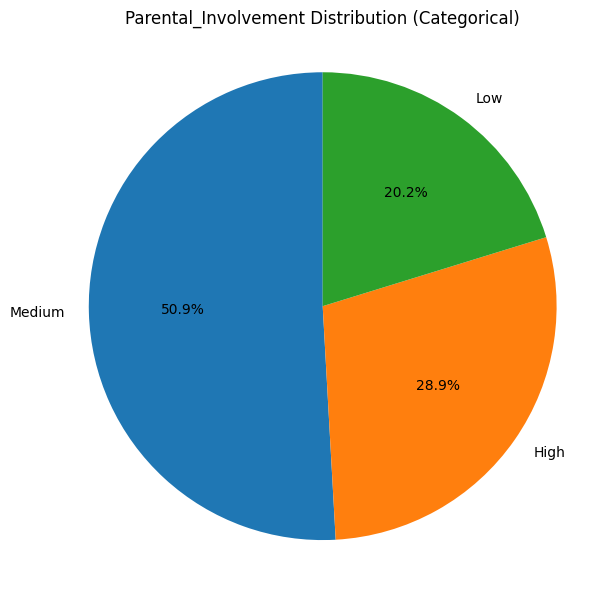

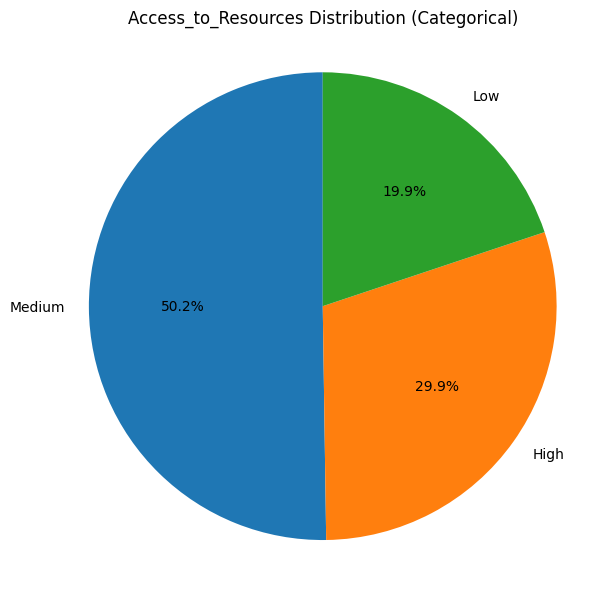

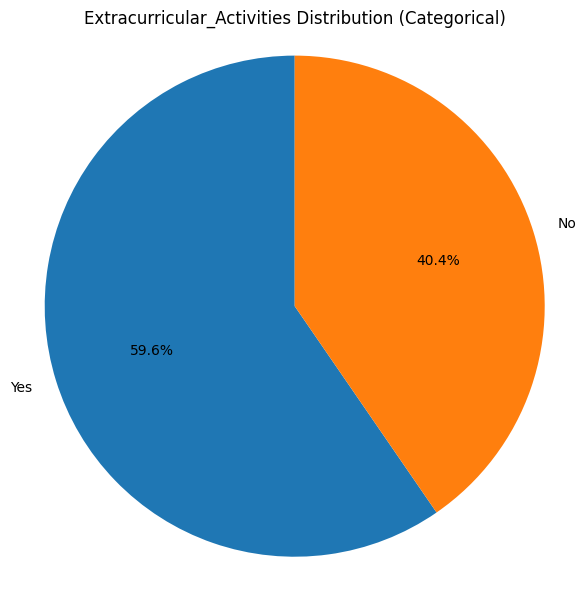

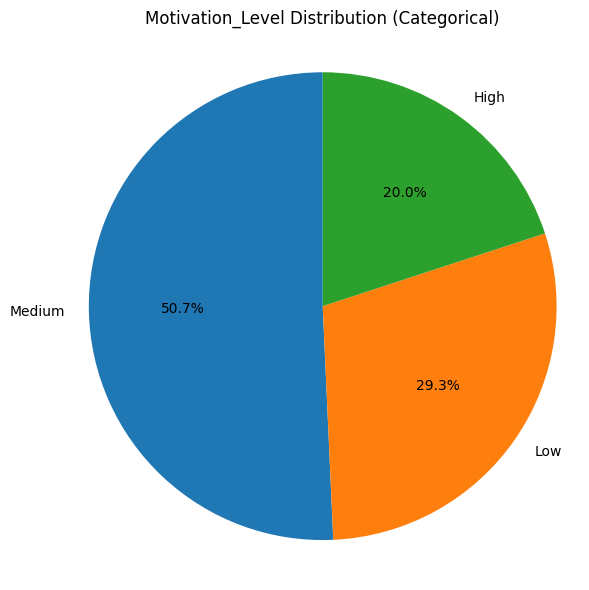

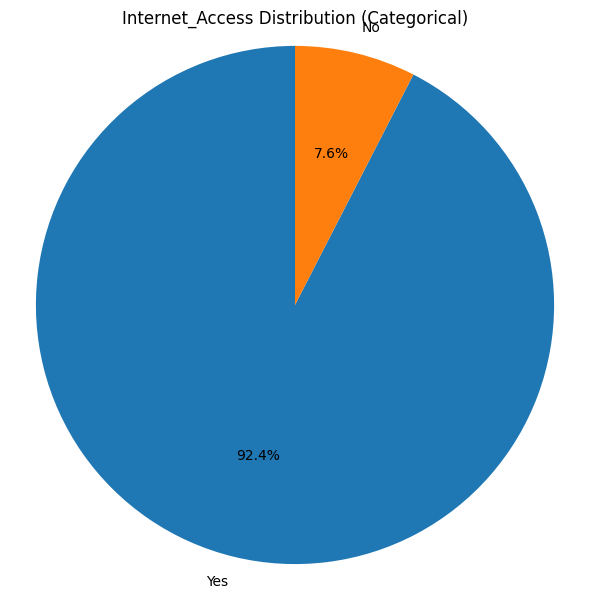

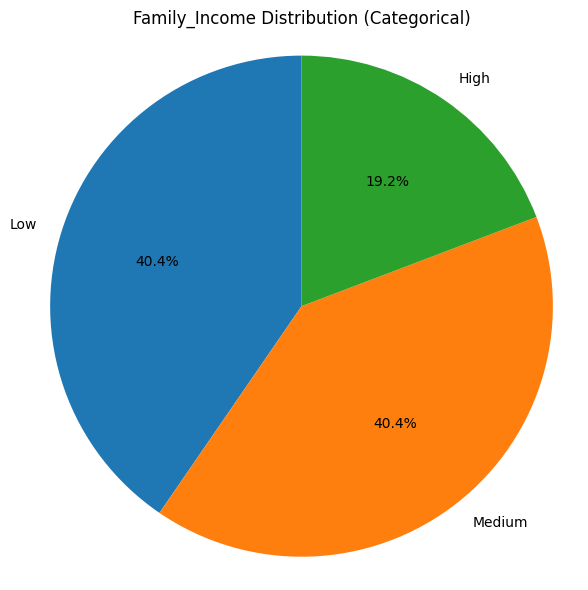

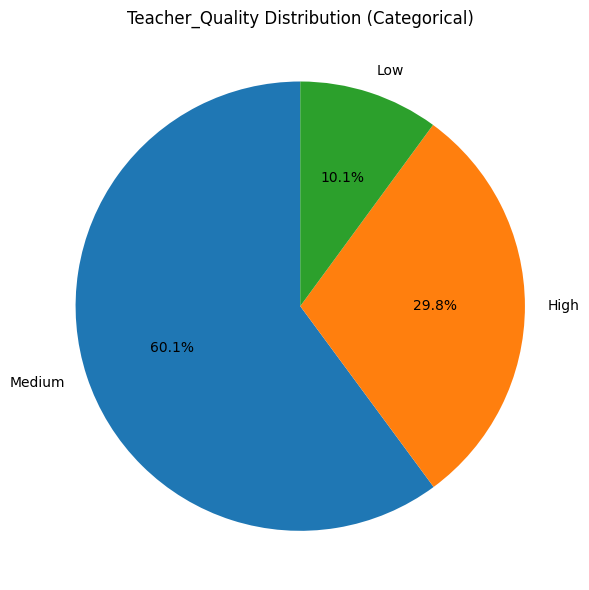

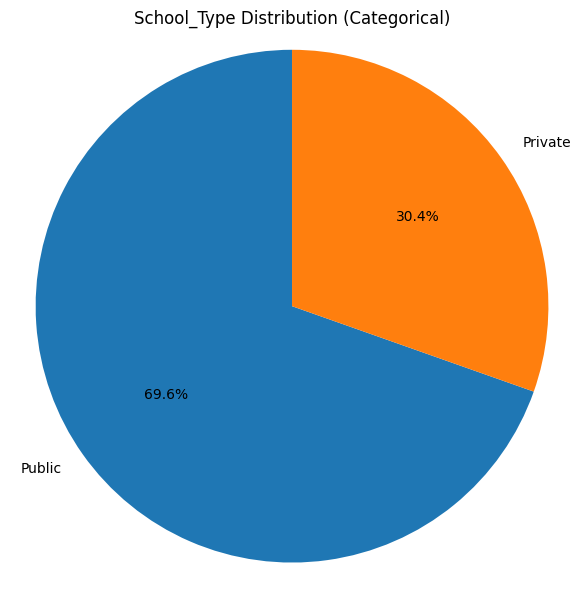

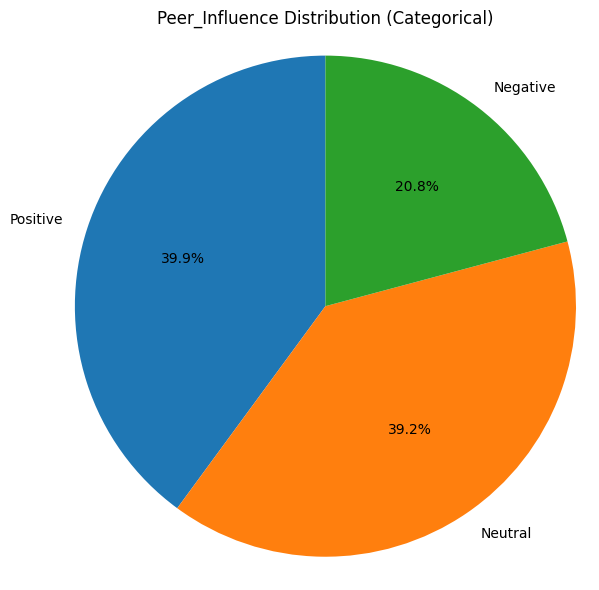

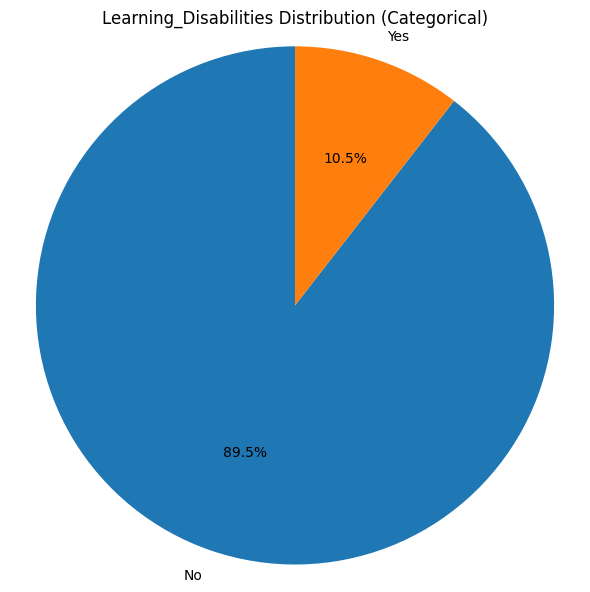

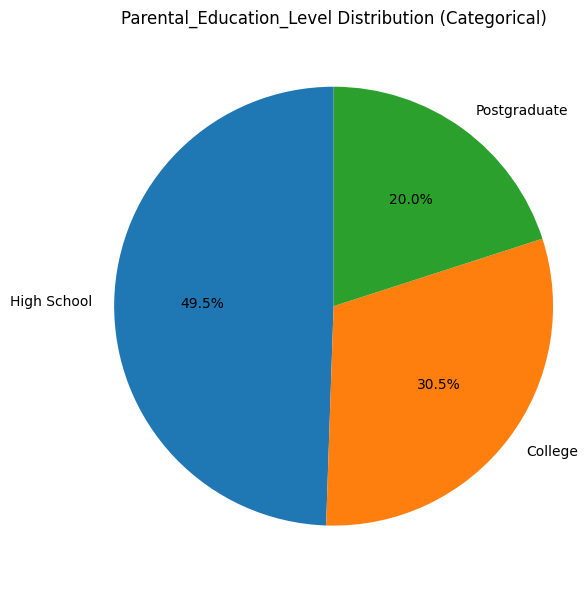

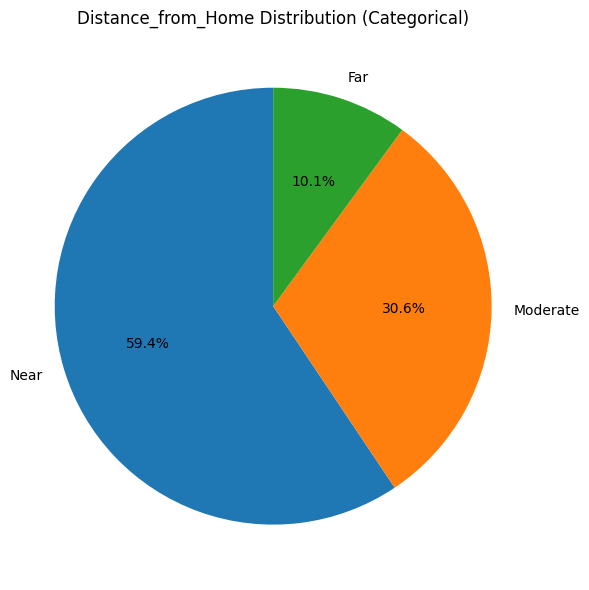

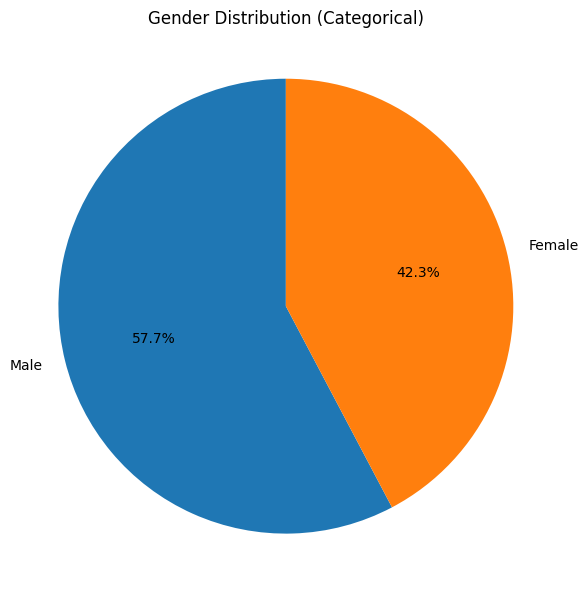

In [4]:
# Categorical and numerical columns
categorical_cols = [
   'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
]



# --- Pie Charts for Categorical Columns ---
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    value_counts = df[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} Distribution (Categorical)")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


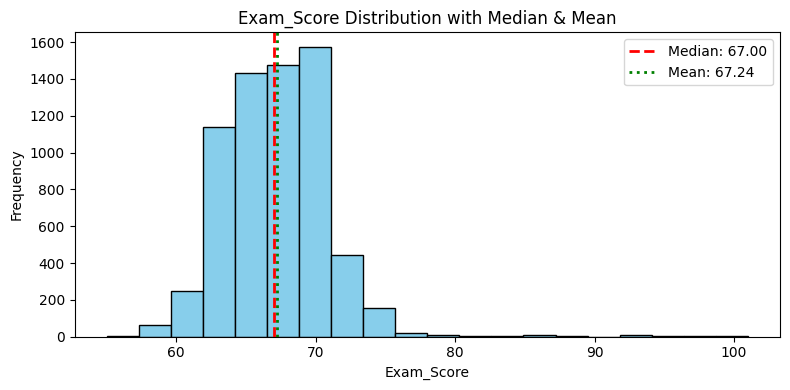

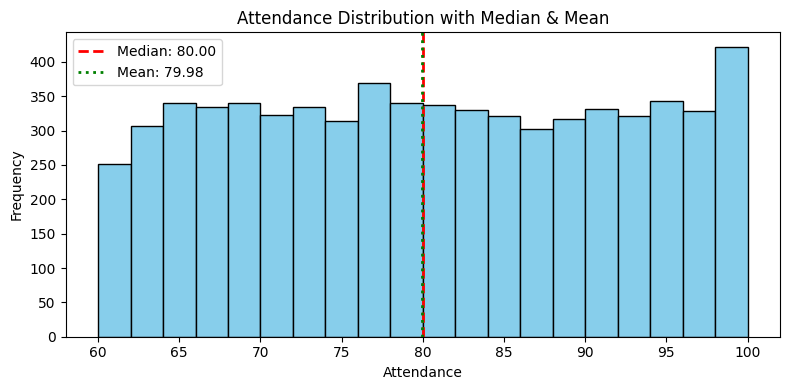

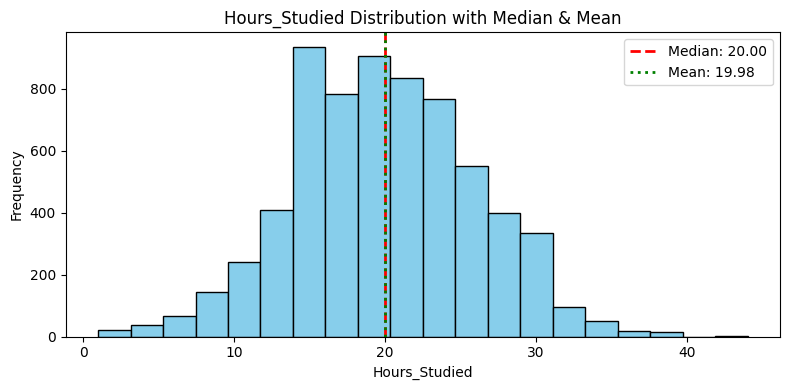

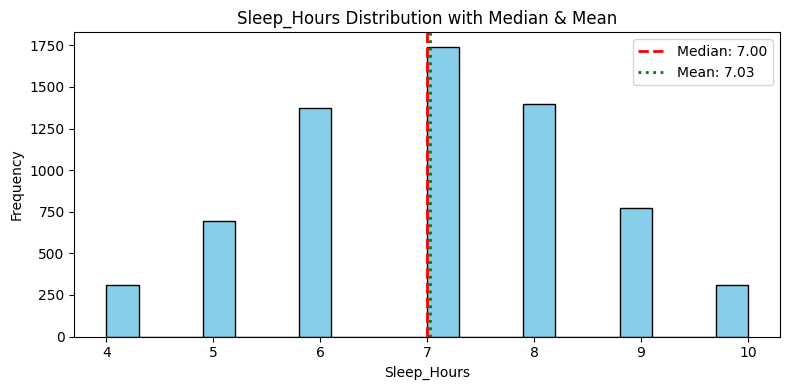

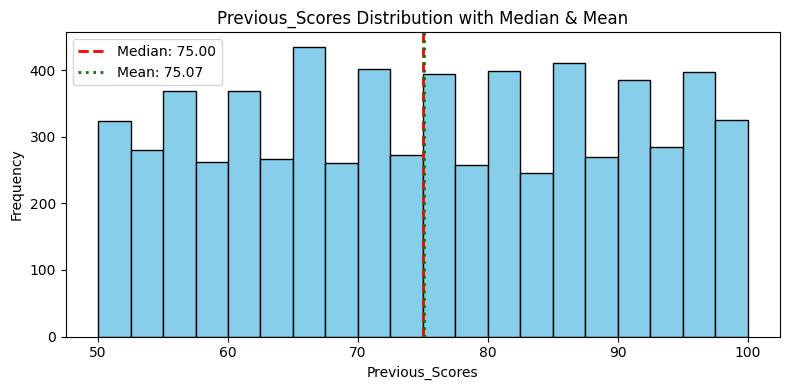

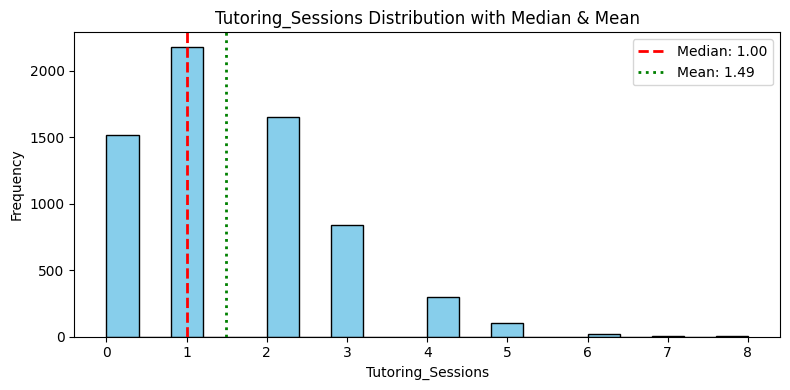

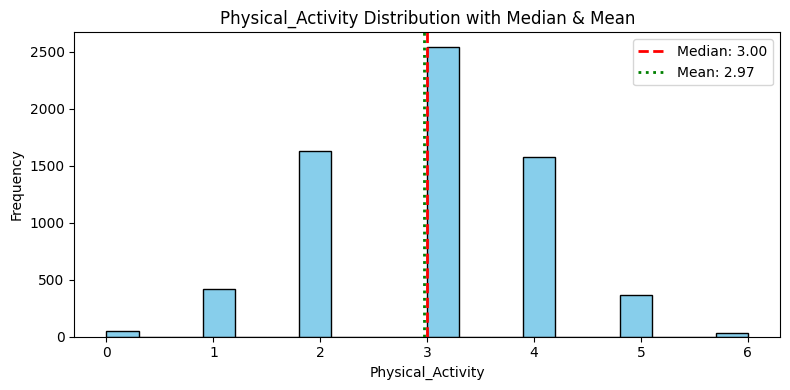

In [5]:

# List of numerical columns
numerical_cols = ['Exam_Score','Attendance',
    'Hours_Studied',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity'
]

# Plot histograms with median and mean lines
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')

    median_val = df[col].median()
    mean_val = df[col].mean()

    plt.axvline(median_val, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.axvline(mean_val, color='green', linestyle='dotted', linewidth=2, label=f'Mean: {mean_val:.2f}')

    plt.title(f"{col} Distribution with Median & Mean")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


REGRESSION


In [6]:
df_labeled = df.copy()

In [7]:
# Define features and target
X = df_labeled.drop('Exam_Score', axis=1)
y = df_labeled['Exam_Score']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Optional: show result
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5285, 19)
X_test shape: (1322, 19)


In [8]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
def model_trials_regression(model, modelname,
                            categorical_cols=None, numerical_cols=None,
                            param_distributions=None, n_iter=20):

    global X_train, X_test, y_train, y_test

    if categorical_cols is None:
        categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender']

    if numerical_cols is None:
        numerical_cols = ['Sleep_Hours',
                          'Tutoring_Sessions', 'Physical_Activity', "Hours_Studied", "Attendance", "Previous_Scores"]

    # Transformers
    categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    numerical_transformer = StandardScaler()

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Or median
        ('scaler', StandardScaler())
    ])

    # Combine them into the ColumnTransformer
    preprocessor = ColumnTransformer([
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

    # Final pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])

    # RandomizedSearchCV
    if param_distributions:
        param_distributions = {f'regressor__{k}': v for k, v in param_distributions.items()}
        rs = RandomizedSearchCV(
            pipeline, param_distributions, n_iter=n_iter,
            scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
        )
        rs.fit(X_train, y_train)
        pipeline = rs.best_estimator_
        print("\n--- Best Params from RandomizedSearchCV ---")
        print(rs.best_params_)

    # K-Fold CV
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    r2_scores = []

    for train_idx, test_idx in kf.split(X_train):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        pipeline.fit(X_tr, y_tr)
        y_pred = pipeline.predict(X_te)
        r2_scores.append(r2_score(y_te, y_pred))

    # Final fit and test evaluation
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Results
    print("\n--- Final Model Evaluation ---")
    print(f"Average CV R² Score: {np.mean(r2_scores):.4f}")
    print(f"Model name: {modelname}")
    print(f"Training R² Score: {round(train_score, 4)}")
    print(f"Testing R² Score: {round(test_score, 4)}")
    print(f"Mean Squared Error: {round(mse, 4)}")
    print(f"Mean Absolute Error: {round(mae, 4)}")
    print(f"R² Score: {round(r2, 4)}")

    # Scatter plot of predictions vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f"Predicted vs Actual: {modelname}")
    plt.xlabel("Actual Exam Score")
    plt.ylabel("Predicted Exam Score")
    plt.tight_layout()
    plt.show()


Testing on indirect Features

--- Final Model Evaluation ---
Average CV R² Score: 0.0503
Model name: Linear Regression
Training R² Score: 0.0589
Testing R² Score: 0.0311
Mean Squared Error: 13.6952
Mean Absolute Error: 2.7575
R² Score: 0.0311


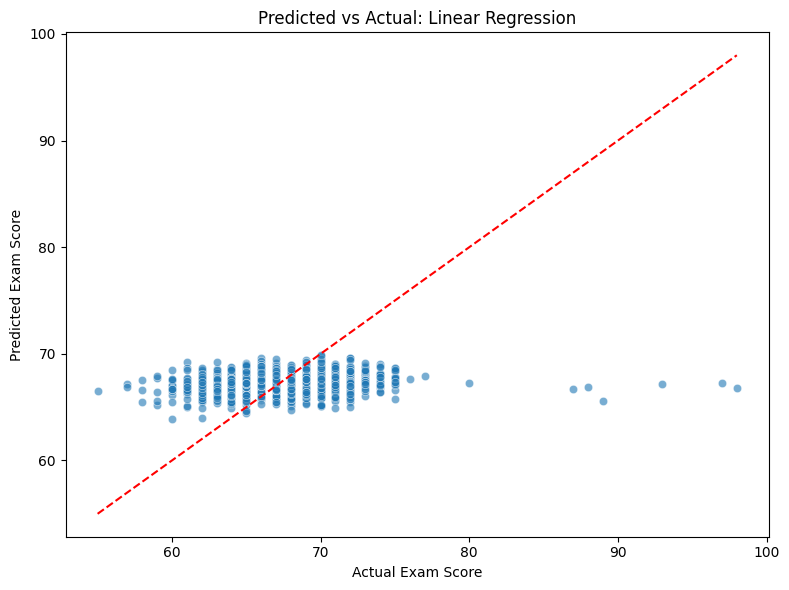

Testing on Performance Related Features

--- Final Model Evaluation ---
Average CV R² Score: 0.6075
Model name: Linear Regression
Training R² Score: 0.5897
Testing R² Score: 0.6433
Mean Squared Error: 5.0416
Mean Absolute Error: 1.2648
R² Score: 0.6433


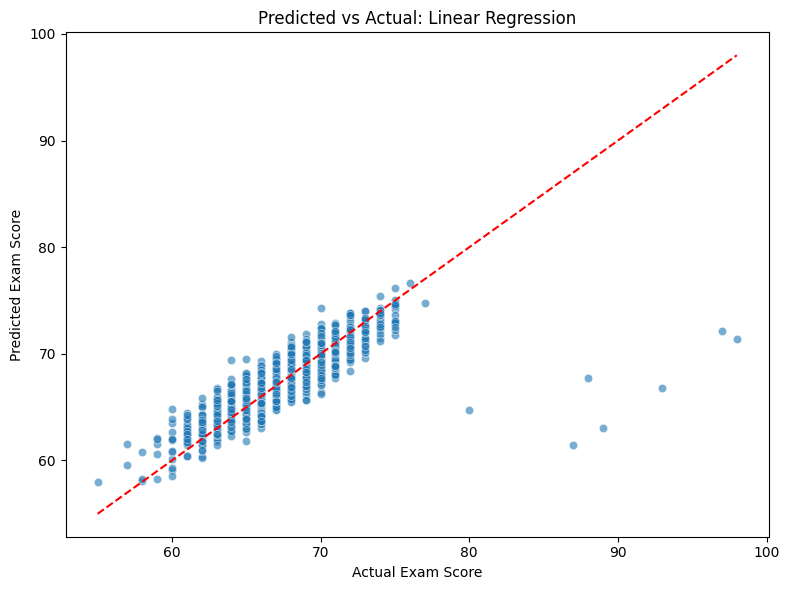

Testing on the Whole Data set

--- Final Model Evaluation ---
Average CV R² Score: 0.6618
Model name: Linear Regression
Training R² Score: 0.6431
Testing R² Score: 0.6888
Mean Squared Error: 4.3993
Mean Absolute Error: 1.0155
R² Score: 0.6888


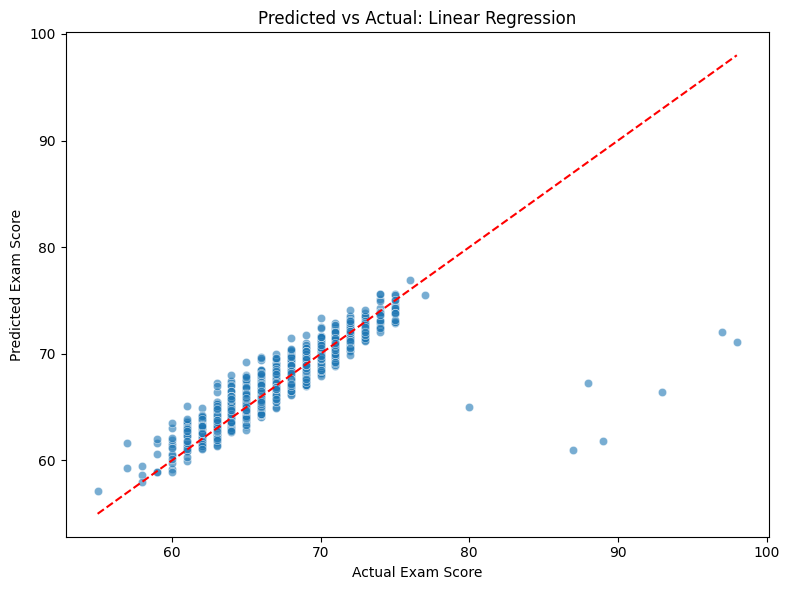

In [10]:
model = LinearRegression()
modelname = "Linear Regression"

print('Testing on indirect Features')
model_trials_regression(model, modelname, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials_regression(model, modelname, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials_regression(model, modelname)

Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__max_depth': 10}

--- Final Model Evaluation ---
Average CV R² Score: 0.0620
Model name: Random Forest
Training R² Score: 0.3616
Testing R² Score: 0.0581
Mean Squared Error: 13.3134
Mean Absolute Error: 2.723
R² Score: 0.0581


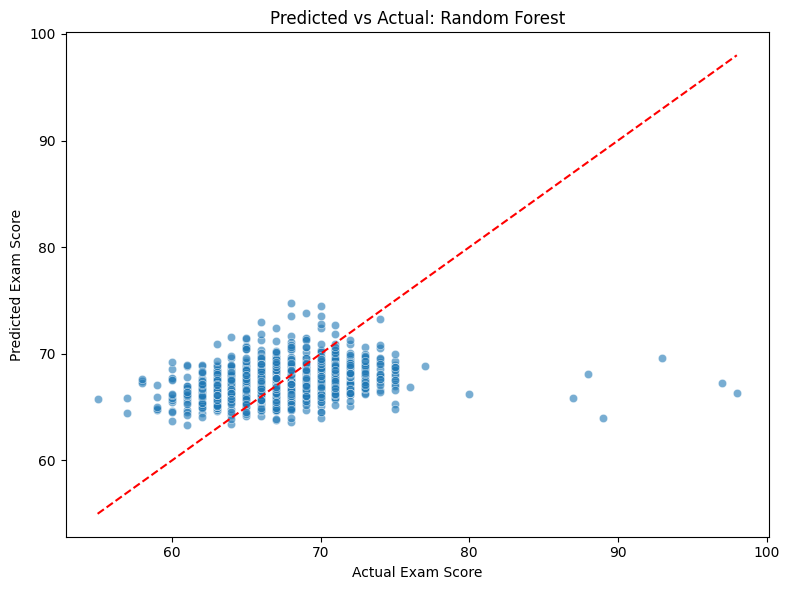

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__max_depth': 10}

--- Final Model Evaluation ---
Average CV R² Score: 0.5628
Model name: Random Forest
Training R² Score: 0.74
Testing R² Score: 0.6092
Mean Squared Error: 5.5238
Mean Absolute Error: 1.3696
R² Score: 0.6092


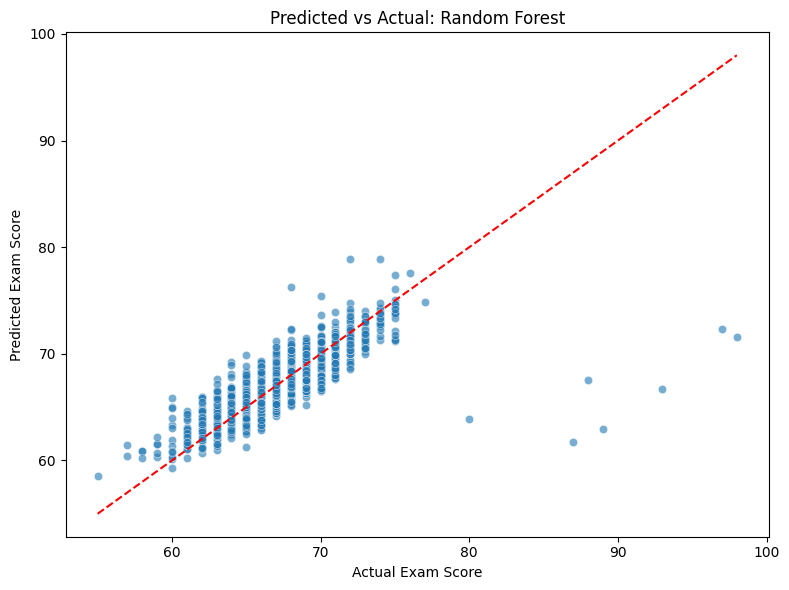

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__max_depth': None}

--- Final Model Evaluation ---
Average CV R² Score: 0.6373
Model name: Random Forest
Training R² Score: 0.8368
Testing R² Score: 0.6686
Mean Squared Error: 4.6847
Mean Absolute Error: 1.1141
R² Score: 0.6686


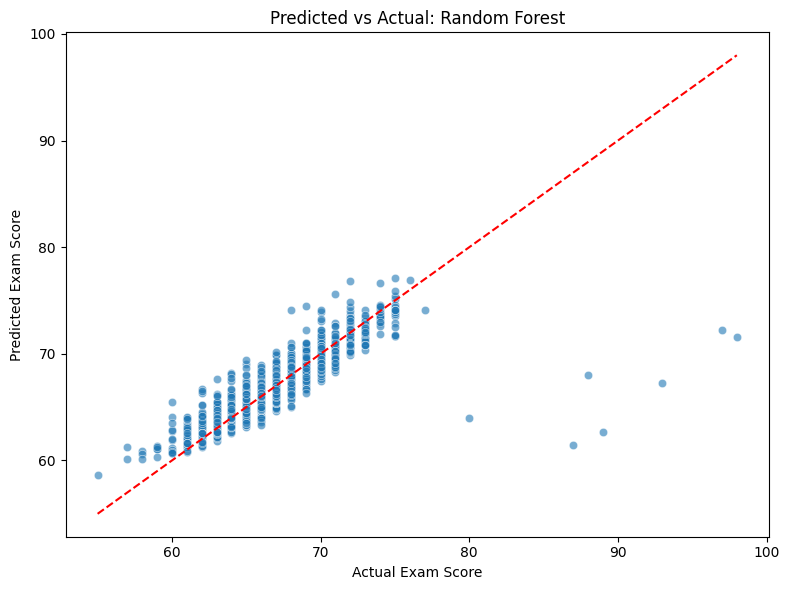

In [11]:



param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

print('Testing on indirect Features')
model_trials_regression(RandomForestRegressor(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])
print('Testing on Performance Related Features')
model_trials_regression(RandomForestRegressor(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])
print('Testing on the Whole Data set')
model_trials_regression(RandomForestRegressor(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10)

Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'regressor__solver': 'adam', 'regressor__learning_rate_init': 0.001, 'regressor__hidden_layer_sizes': (50, 50), 'regressor__alpha': 0.0001, 'regressor__activation': 'relu'}

--- Final Model Evaluation ---
Average CV R² Score: 0.0476
Model name: MLP Regressor
Training R² Score: 0.1436
Testing R² Score: 0.0353
Mean Squared Error: 13.6359
Mean Absolute Error: 2.7377
R² Score: 0.0353


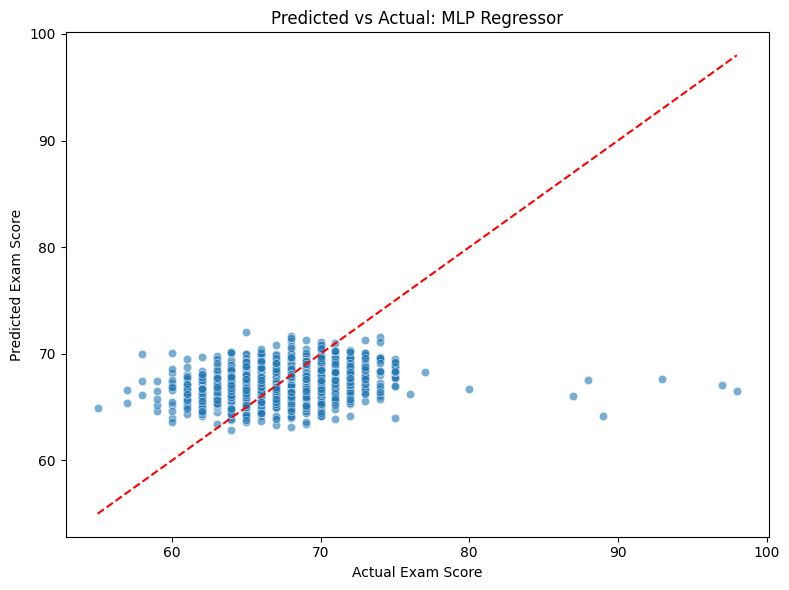

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'regressor__solver': 'adam', 'regressor__learning_rate_init': 0.001, 'regressor__hidden_layer_sizes': (100,), 'regressor__alpha': 0.0001, 'regressor__activation': 'tanh'}

--- Final Model Evaluation ---
Average CV R² Score: 0.6019
Model name: MLP Regressor
Training R² Score: 0.5896
Testing R² Score: 0.6438
Mean Squared Error: 5.0355
Mean Absolute Error: 1.2665
R² Score: 0.6438


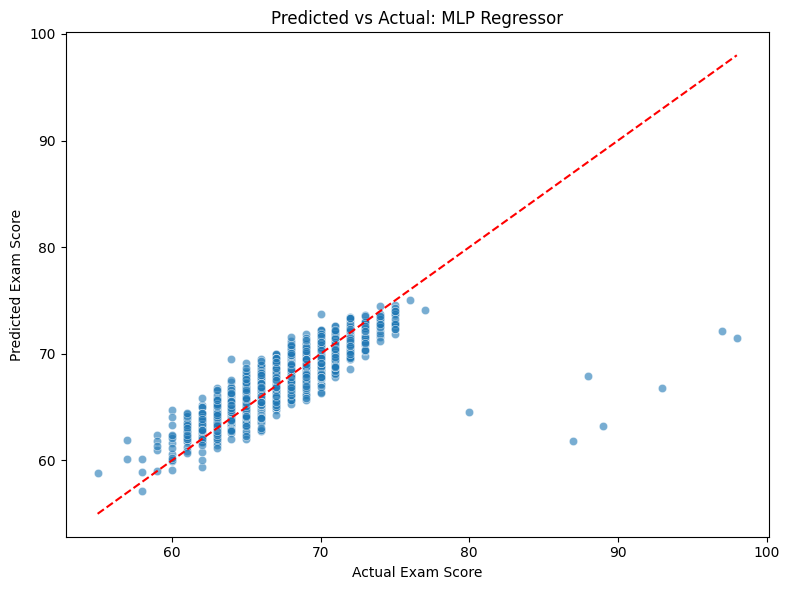

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'regressor__solver': 'adam', 'regressor__learning_rate_init': 0.01, 'regressor__hidden_layer_sizes': (100,), 'regressor__alpha': 0.01, 'regressor__activation': 'relu'}

--- Final Model Evaluation ---
Average CV R² Score: 0.6874
Model name: MLP Regressor
Training R² Score: 0.7129
Testing R² Score: 0.723
Mean Squared Error: 3.9148
Mean Absolute Error: 0.7784
R² Score: 0.723


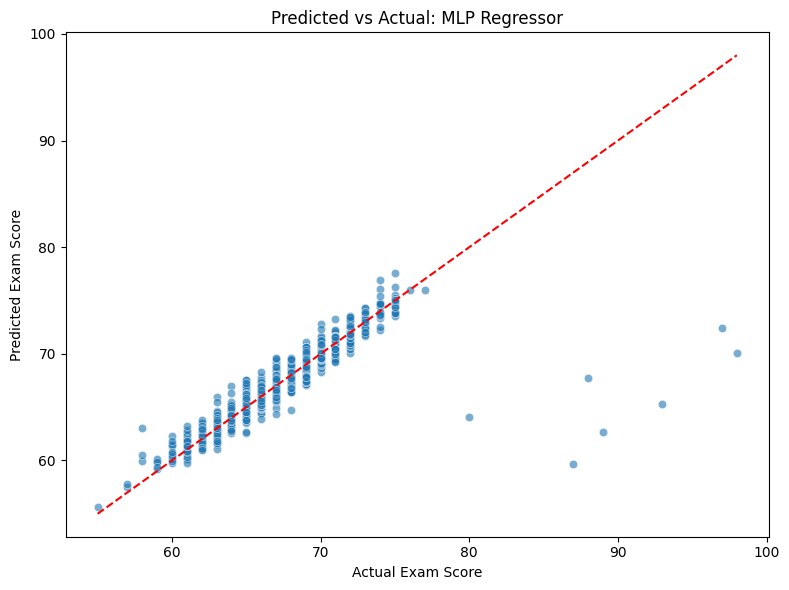

In [12]:


model = MLPRegressor(random_state=42, max_iter=1000)
modelname = "MLP Regressor"

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization)
    'learning_rate_init': [0.001, 0.01]
}
print('Testing on indirect Features')
model_trials_regression(model, modelname, param_distributions=param_dist, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials_regression(model, modelname, param_distributions=param_dist, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials_regression(model, modelname, param_distributions=param_dist, n_iter=10)

MULTIVARIABLE CLASSIFICATION

In [13]:
# Calculate quartiles and label them into 4 classes
df_labeled = df.copy()

# Create 4 quantile-based bins: 0 (lowest 25%) to 3 (highest 25%)
df_labeled['Exam_Score'] = pd.qcut(
    df_labeled['Exam_Score'],
    q=4,
    labels=['0', '1', '2', '3']
)

# Preview and verify class distribution
print(df_labeled['Exam_Score'].value_counts())


Exam_Score
0    2131
3    1625
1    1468
2    1383
Name: count, dtype: int64


In [14]:
# Define features and target
X = df_labeled.drop('Exam_Score', axis=1)
y = df_labeled['Exam_Score']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: show result
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")

X_train shape: (5285, 19)
X_test shape: (1322, 19)
y_train distribution:
Exam_Score
0    1705
3    1300
1    1174
2    1106
Name: count, dtype: int64
y_test distribution:
Exam_Score
0    426
3    325
1    294
2    277
Name: count, dtype: int64


In [15]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [16]:

def model_trials(model, modelname,
                            categorical_cols=None, numerical_cols=None,
                            param_distributions=None, n_iter=20,
                            class_labels=None):

    global X_train, X_test, y_train, y_test


    # Define default columns if not passed
    if categorical_cols is None:
        categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender']
    if numerical_cols is None:
        numerical_cols = ['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity',
                          "Hours_Studied", "Attendance", "Previous_Scores"]

    # Transformers
    categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    numerical_transformer = StandardScaler()

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Or median
        ('scaler', StandardScaler())
    ])

    # Combine them into the ColumnTransformer
    preprocessor = ColumnTransformer([
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

    # Final pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    # RandomizedSearchCV
    if param_distributions:
        param_distributions = {f'classifier__{k}': v for k, v in param_distributions.items()}
        rs = RandomizedSearchCV(
            pipeline, param_distributions, n_iter=n_iter,
            scoring='accuracy', cv=5, n_jobs=-1, random_state=42
        )
        rs.fit(X_train, y_train)
        pipeline = rs.best_estimator_
        print("\n--- Best Params from RandomizedSearchCV ---")
        print(rs.best_params_)

    # K-Fold CV
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, test_idx in kf.split(X_train):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        pipeline.fit(X_tr, y_tr)
        y_pred = pipeline.predict(X_te)
        accuracies.append(accuracy_score(y_te, y_pred))

    # Final fit and test evaluation
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Specificity per class (One-vs-rest)
    cm = confusion_matrix(y_test, y_pred_test)
    spec_list = []
    for i in range(len(cm)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0
        spec_list.append(spec)
    avg_spec = np.mean(spec_list)

    # Results
    print("\n--- Final Model Evaluation ---")
    print(f"Average CV Accuracy: {np.mean(accuracies):.4f}")
    print(f"Model name: {modelname}")
    print(f"Training Score: {round(train_score, 4)}")
    print(f"Testing Score: {round(test_score, 4)}")
    print(f"Accuracy: {round(acc, 4)}")
    print(f"Avg Specificity: {round(avg_spec, 4)}")
    print(f"Precision (weighted): {round(prec, 4)}")
    print(f"Recall (weighted): {round(recall, 4)}")
    print(f"F1 Score (weighted): {round(f1, 4)}")

    # If no class labels were passed, auto-generate them
    if class_labels is None:
        class_labels = sorted(np.unique(y_test))

    # Confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 20})
    plt.title(f"Confusion Matrix: {modelname}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}

--- Final Model Evaluation ---
Average CV Accuracy: 0.3729
Model name: Random Forest
Training Score: 0.6377
Testing Score: 0.3812
Accuracy: 0.3812
Avg Specificity: 0.7817
Precision (weighted): 0.3178
Recall (weighted): 0.3812
F1 Score (weighted): 0.3053


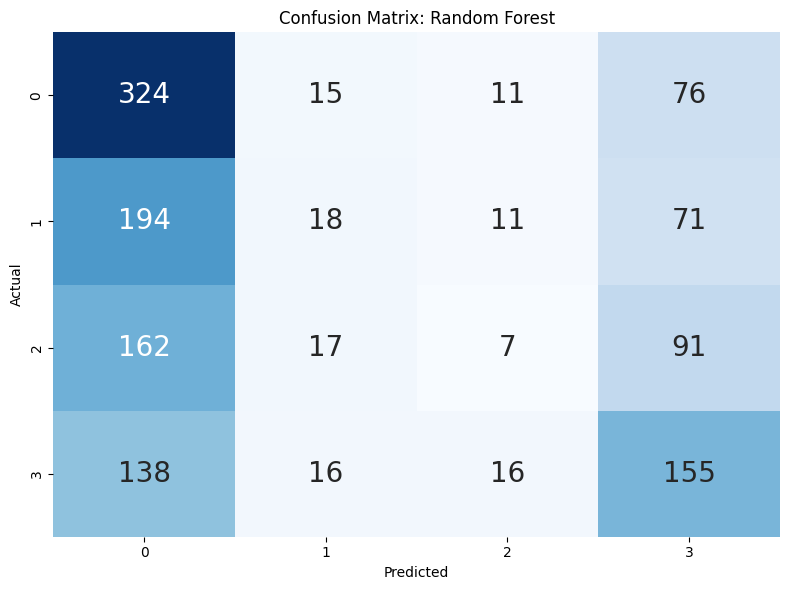

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}

--- Final Model Evaluation ---
Average CV Accuracy: 0.6329
Model name: Random Forest
Training Score: 0.8352
Testing Score: 0.6384
Accuracy: 0.6384
Avg Specificity: 0.8799
Precision (weighted): 0.6336
Recall (weighted): 0.6384
F1 Score (weighted): 0.6354


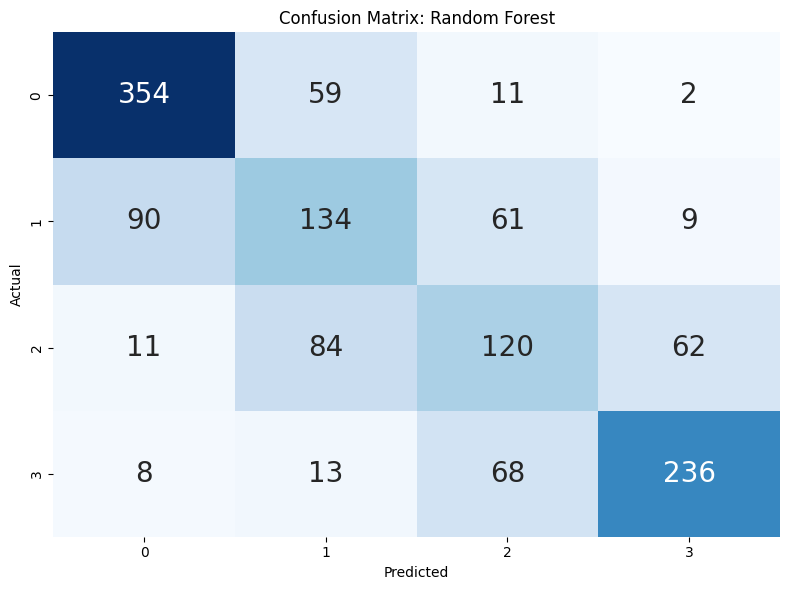

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 30}

--- Final Model Evaluation ---
Average CV Accuracy: 0.7109
Model name: Random Forest
Training Score: 0.9981
Testing Score: 0.7209
Accuracy: 0.7209
Avg Specificity: 0.9063
Precision (weighted): 0.7105
Recall (weighted): 0.7209
F1 Score (weighted): 0.7125


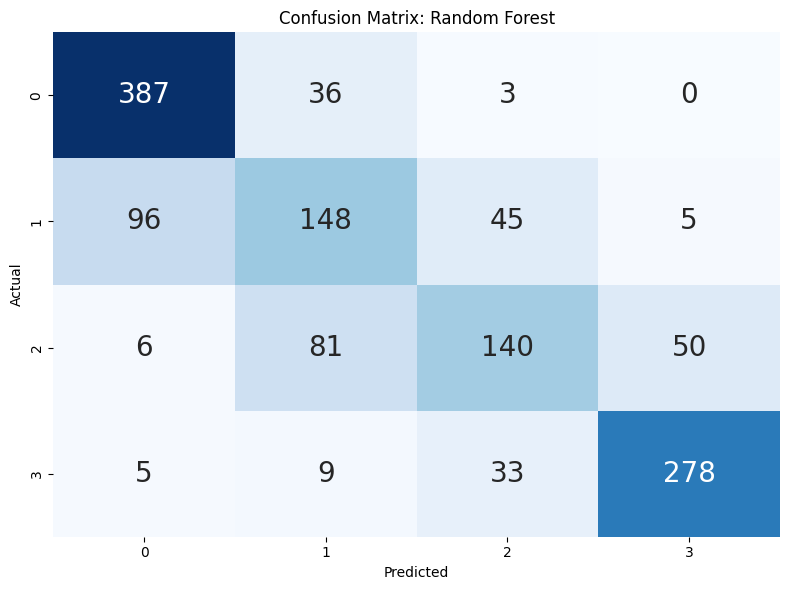

In [17]:


param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
print('Testing on indirect Features')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])
print('Testing on Performance Related Features')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])
print('Testing on the Whole Data set')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10)

Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__max_iter': 200, 'classifier__C': 100}

--- Final Model Evaluation ---
Average CV Accuracy: 0.3597
Model name: Logistic Regression
Training Score: 0.3618
Testing Score: 0.3714
Accuracy: 0.3714
Avg Specificity: 0.7766
Precision (weighted): 0.2548
Recall (weighted): 0.3714
F1 Score (weighted): 0.268


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


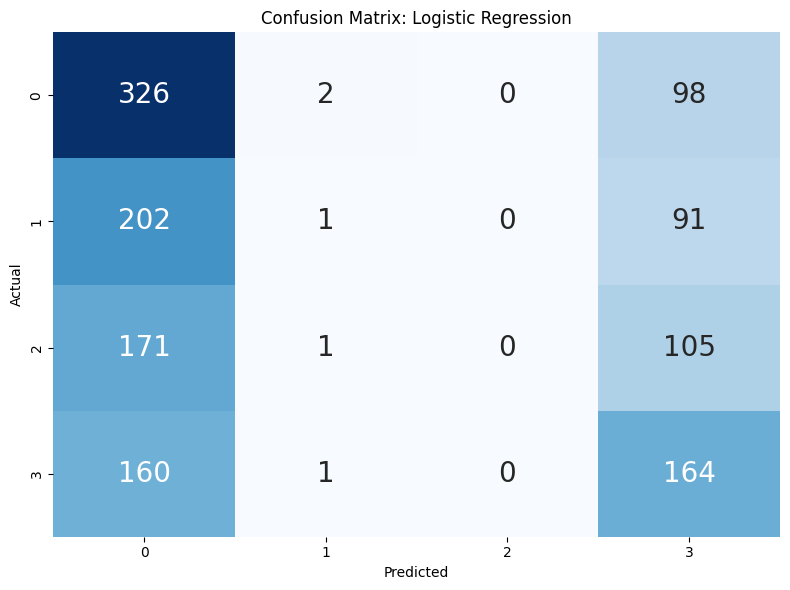

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__max_iter': 100, 'classifier__C': 1}

--- Final Model Evaluation ---
Average CV Accuracy: 0.6628
Model name: Logistic Regression
Training Score: 0.6643
Testing Score: 0.6551
Accuracy: 0.6551
Avg Specificity: 0.8855
Precision (weighted): 0.6488
Recall (weighted): 0.6551
F1 Score (weighted): 0.6515


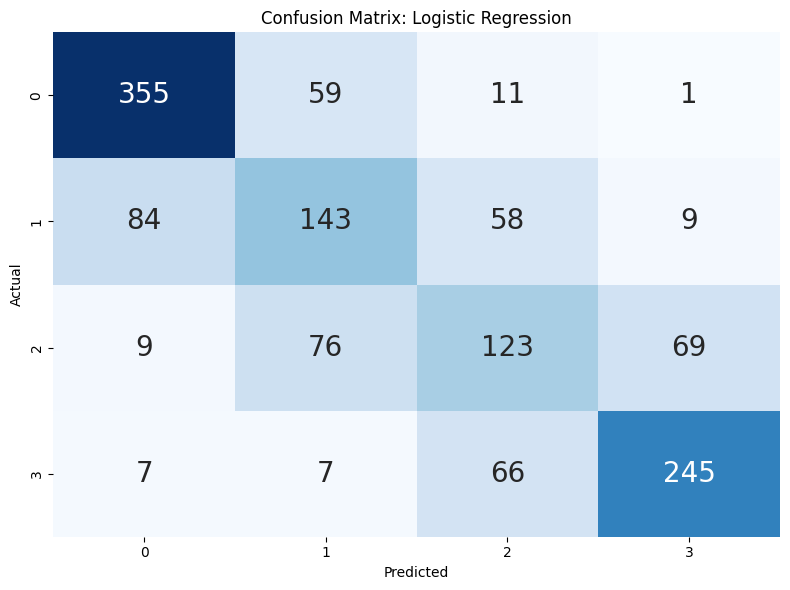

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__max_iter': 500, 'classifier__C': 100}

--- Final Model Evaluation ---
Average CV Accuracy: 0.7222
Model name: Logistic Regression
Training Score: 0.7283
Testing Score: 0.7269
Accuracy: 0.7269
Avg Specificity: 0.9094
Precision (weighted): 0.7244
Recall (weighted): 0.7269
F1 Score (weighted): 0.7255


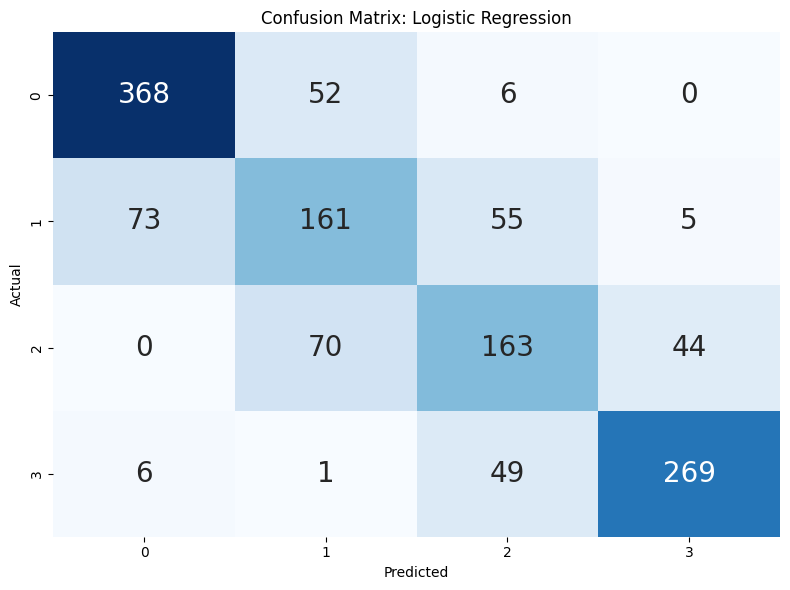

In [18]:


param_dist_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

print('Testing on indirect Features')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10)

Testing on indirect Features


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'sgd', 'classifier__max_iter': 500, 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.0001, 'classifier__activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


--- Final Model Evaluation ---
Average CV Accuracy: 0.3635
Model name: MLP Classifier
Training Score: 0.3958
Testing Score: 0.3918
Accuracy: 0.3918
Avg Specificity: 0.7848
Precision (weighted): 0.377
Recall (weighted): 0.3918
F1 Score (weighted): 0.3115


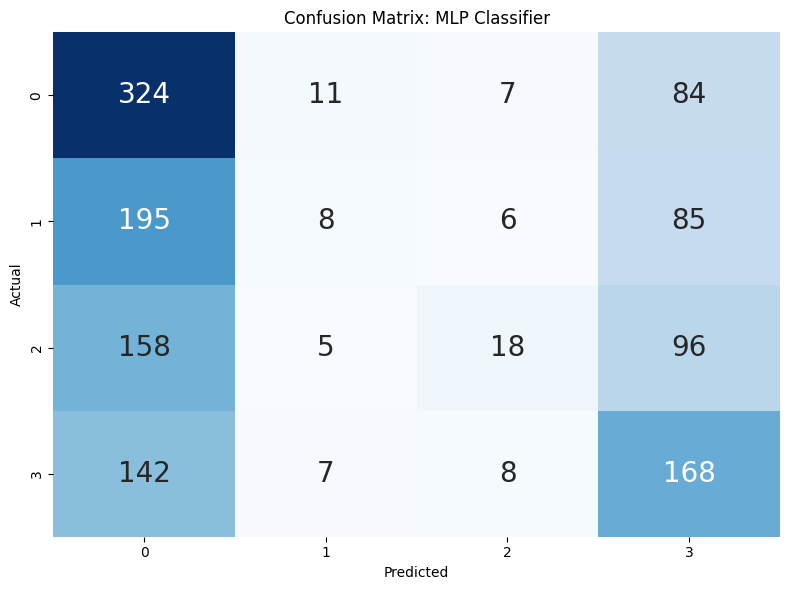

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'adam', 'classifier__max_iter': 300, 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.001, 'classifier__activation': 'tanh'}

--- Final Model Evaluation ---
Average CV Accuracy: 0.6600
Model name: MLP Classifier
Training Score: 0.6657
Testing Score: 0.6573
Accuracy: 0.6573
Avg Specificity: 0.8864
Precision (weighted): 0.6545
Recall (weighted): 0.6573
F1 Score (weighted): 0.6556


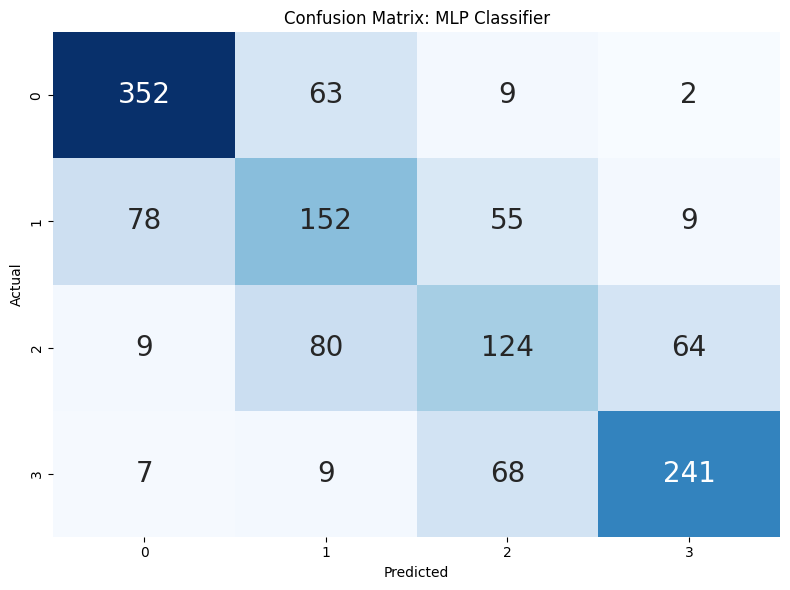

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'adam', 'classifier__max_iter': 500, 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__alpha': 0.0001, 'classifier__activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


--- Final Model Evaluation ---
Average CV Accuracy: 0.8702
Model name: MLP Classifier
Training Score: 0.9977
Testing Score: 0.8669
Accuracy: 0.8669
Avg Specificity: 0.956
Precision (weighted): 0.8675
Recall (weighted): 0.8669
F1 Score (weighted): 0.8671


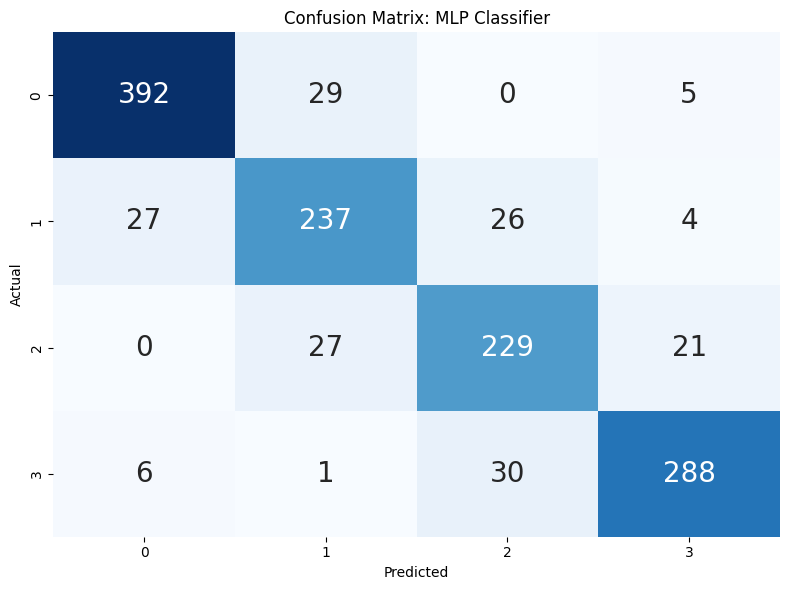

In [19]:
from sklearn.neural_network import MLPClassifier

# Гиперпараметры для RandomizedSearch
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500]
}

print('Testing on indirect Features')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10)

BINARY CLASSIFICATION

In [20]:

def model_trials(model, modelname,
                            categorical_cols=None, numerical_cols=None,
                            param_distributions=None, n_iter=20,
                            class_labels=None):

    global X_train, X_test, y_train, y_test


    # Define default columns if not passed
    if categorical_cols is None:
        categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender']
    if numerical_cols is None:
        numerical_cols = ['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity',
                          "Hours_Studied", "Attendance", "Previous_Scores"]

    # Transformers
    categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    numerical_transformer = StandardScaler()

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Or median
        ('scaler', StandardScaler())
    ])

    # Combine them into the ColumnTransformer
    preprocessor = ColumnTransformer([
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

    # Final pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    # RandomizedSearchCV
    if param_distributions:
        param_distributions = {f'classifier__{k}': v for k, v in param_distributions.items()}
        rs = RandomizedSearchCV(
            pipeline, param_distributions, n_iter=n_iter,
            scoring='accuracy', cv=5, n_jobs=-1, random_state=42
        )
        rs.fit(X_train, y_train)
        pipeline = rs.best_estimator_
        print("\n--- Best Params from RandomizedSearchCV ---")
        print(rs.best_params_)

    # K-Fold CV
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, test_idx in kf.split(X_train):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        pipeline.fit(X_tr, y_tr)
        y_pred = pipeline.predict(X_te)
        accuracies.append(accuracy_score(y_te, y_pred))

    # Final fit and test evaluation
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='binary')
    recall = recall_score(y_test, y_pred_test, average='binary')
    f1 = f1_score(y_test, y_pred_test, average='binary')

    # Specificity per class (One-vs-rest)
    cm = confusion_matrix(y_test, y_pred_test)
    spec_list = []
    for i in range(len(cm)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0
        spec_list.append(spec)
    avg_spec = np.mean(spec_list)

    # Results
    print("\n--- Final Model Evaluation ---")
    print(f"Average CV Accuracy: {np.mean(accuracies):.4f}")
    print(f"Model name: {modelname}")
    print(f"Training Score: {round(train_score, 4)}")
    print(f"Testing Score: {round(test_score, 4)}")
    print(f"Accuracy: {round(acc, 4)}")
    print(f"Avg Specificity: {round(avg_spec, 4)}")
    print(f"Precision: {round(prec, 4)}")
    print(f"Recall: {round(recall, 4)}")
    print(f"F1 Score: {round(f1, 4)}")

    # If no class labels were passed, auto-generate them
    if class_labels is None:
        class_labels = sorted(np.unique(y_test))

    # Confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 20})
    plt.title(f"Confusion Matrix: {modelname}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [21]:
# Calculate the mean of Exam_Score
exam_mean = df['Exam_Score'].mean()

 #Create a new dataset with Exam_Score replaced
df_labeled = df.copy()
df_labeled['Exam_Score'] = df_labeled['Exam_Score'].apply(
    lambda x: '0' if x < exam_mean else '1'
)

# Preview and verify
print(df_labeled['Exam_Score'].value_counts())


Exam_Score
0    3599
1    3008
Name: count, dtype: int64


In [22]:
# Define features and target
X = df_labeled.drop('Exam_Score', axis=1)
y = df_labeled['Exam_Score']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: show result
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")

X_train shape: (5285, 19)
X_test shape: (1322, 19)
y_train distribution:
Exam_Score
0    2879
1    2406
Name: count, dtype: int64
y_test distribution:
Exam_Score
0    720
1    602
Name: count, dtype: int64


In [23]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}

--- Final Model Evaluation ---
Average CV Accuracy: 0.6081
Model name: Random Forest
Training Score: 0.7737
Testing Score: 0.6142
Accuracy: 0.6142
Avg Specificity: 0.6027
Precision: 0.5962
Recall: 0.4734
F1 Score: 0.5278


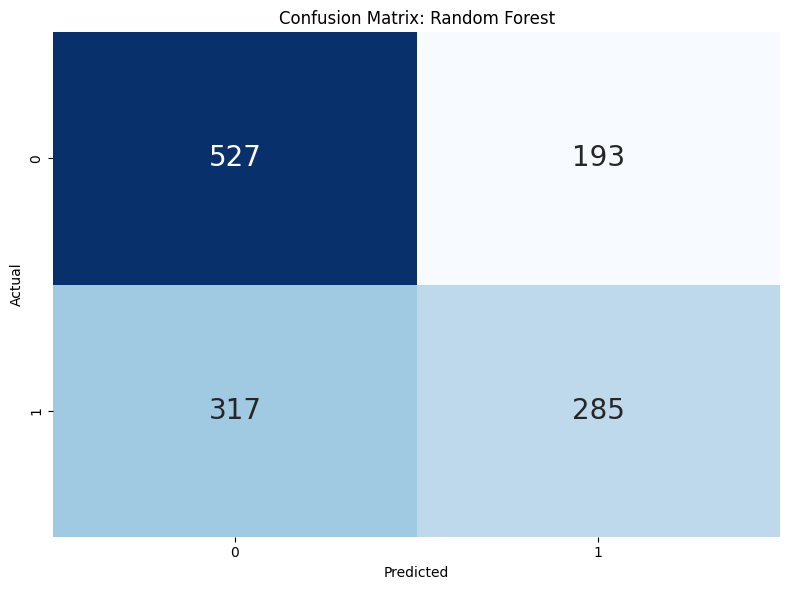

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 30}

--- Final Model Evaluation ---
Average CV Accuracy: 0.8547
Model name: Random Forest
Training Score: 0.9639
Testing Score: 0.8502
Accuracy: 0.8502
Avg Specificity: 0.8481
Precision: 0.8435
Recall: 0.8239
F1 Score: 0.8336


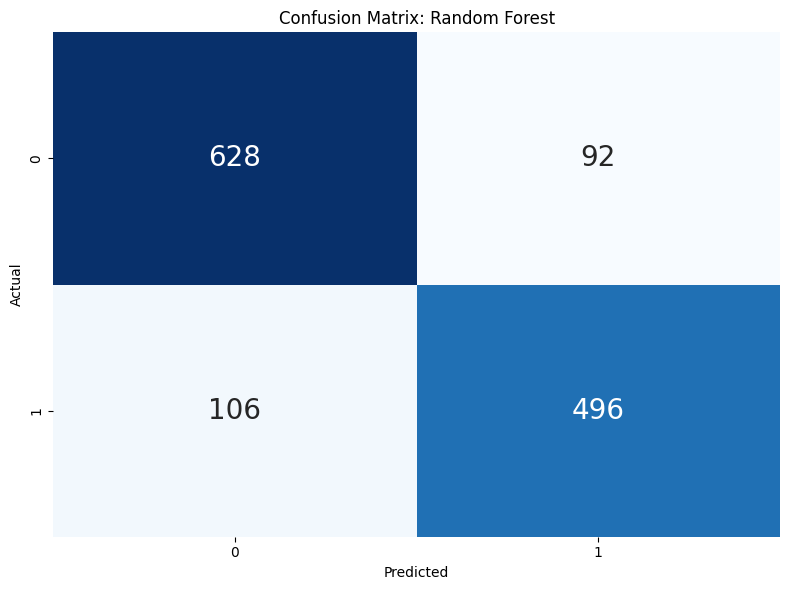

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__max_depth': 20}

--- Final Model Evaluation ---
Average CV Accuracy: 0.9014
Model name: Random Forest
Training Score: 1.0
Testing Score: 0.8949
Accuracy: 0.8949
Avg Specificity: 0.8931
Precision: 0.893
Recall: 0.8738
F1 Score: 0.8833


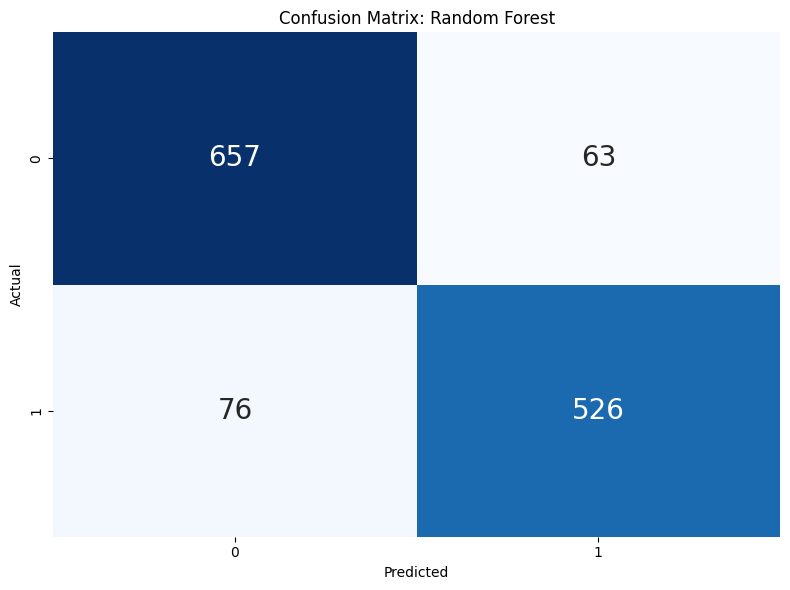

In [24]:

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
print('Testing on indirect Features')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])
print('Testing on Performance Related Features')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])
print('Testing on the Whole Data set')
model_trials(RandomForestClassifier(random_state=42), "Random Forest", param_distributions=param_dist, n_iter=10)

Testing on indirect Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__max_iter': 200, 'classifier__C': 100}

--- Final Model Evaluation ---
Average CV Accuracy: 0.5845
Model name: Logistic Regression
Training Score: 0.5885
Testing Score: 0.6029
Accuracy: 0.6029
Avg Specificity: 0.5886
Precision: 0.5877
Recall: 0.4286
F1 Score: 0.4957


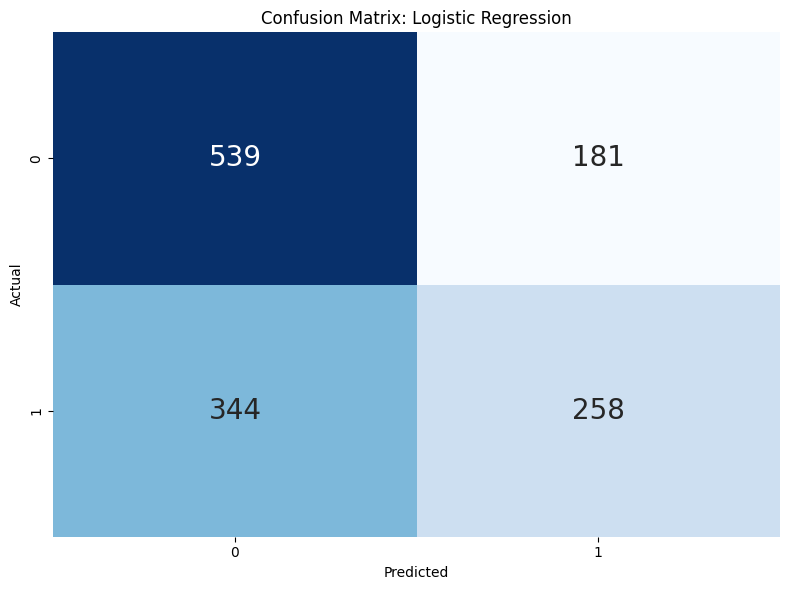

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__max_iter': 100, 'classifier__C': 0.01}

--- Final Model Evaluation ---
Average CV Accuracy: 0.8696
Model name: Logistic Regression
Training Score: 0.87
Testing Score: 0.8646
Accuracy: 0.8646
Avg Specificity: 0.8632
Precision: 0.8543
Recall: 0.8472
F1 Score: 0.8507


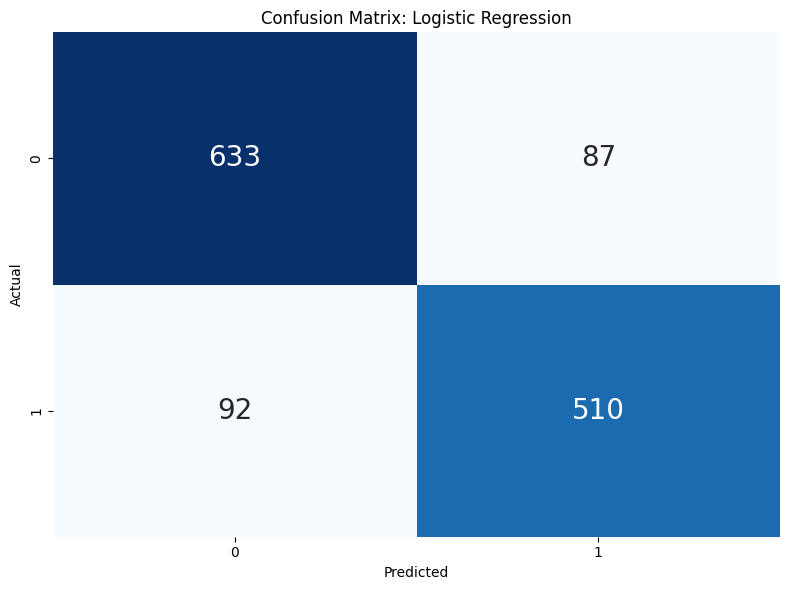

Testing on the Whole Data set

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__max_iter': 500, 'classifier__C': 100}

--- Final Model Evaluation ---
Average CV Accuracy: 0.8927
Model name: Logistic Regression
Training Score: 0.8937
Testing Score: 0.8949
Accuracy: 0.8949
Avg Specificity: 0.8941
Precision: 0.8839
Recall: 0.8854
F1 Score: 0.8846


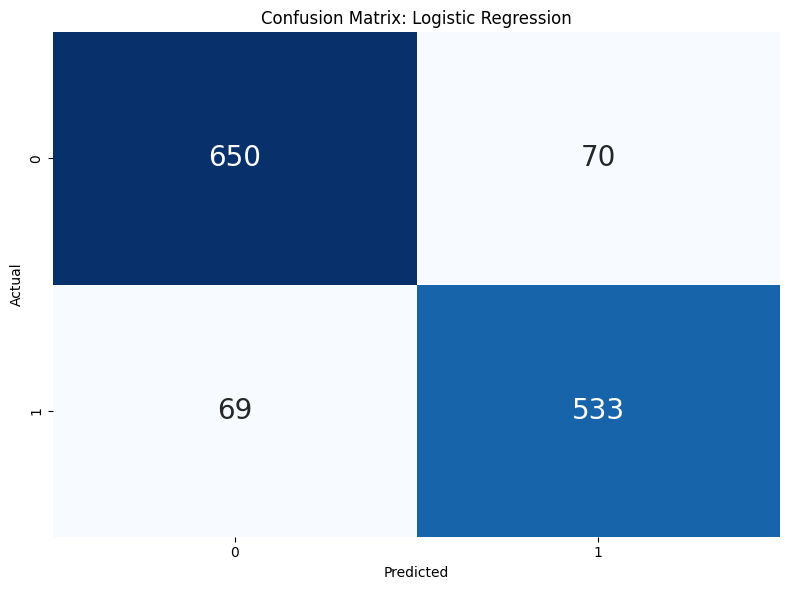

In [25]:
from sklearn.linear_model import LogisticRegression

param_dist_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

print('Testing on indirect Features')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials(LogisticRegression(), "Logistic Regression", param_distributions=param_dist_lr, n_iter=10)

Testing on indirect Features


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'adam', 'classifier__max_iter': 300, 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.001, 'classifier__activation': 'tanh'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


--- Final Model Evaluation ---
Average CV Accuracy: 0.6023
Model name: MLP Classifier
Training Score: 0.6677
Testing Score: 0.6104
Accuracy: 0.6104
Avg Specificity: 0.5957
Precision: 0.6009
Recall: 0.4302
F1 Score: 0.5015


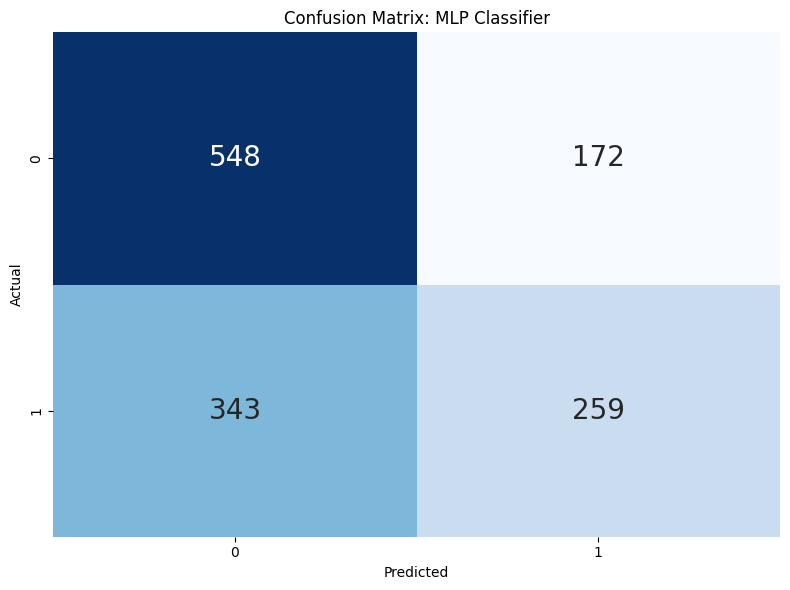

Testing on Performance Related Features

--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'sgd', 'classifier__max_iter': 500, 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.001, 'classifier__activation': 'tanh'}

--- Final Model Evaluation ---
Average CV Accuracy: 0.8700
Model name: MLP Classifier
Training Score: 0.8694
Testing Score: 0.8616
Accuracy: 0.8616
Avg Specificity: 0.8604
Precision: 0.8486
Recall: 0.8472
F1 Score: 0.8479


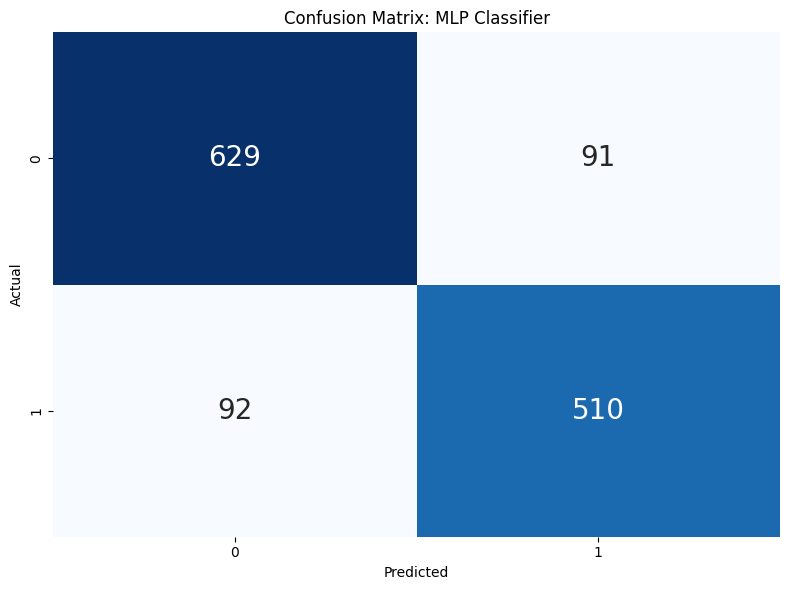

Testing on the Whole Data set


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Best Params from RandomizedSearchCV ---
{'classifier__solver': 'adam', 'classifier__max_iter': 300, 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.01, 'classifier__activation': 'relu'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


--- Final Model Evaluation ---
Average CV Accuracy: 0.9429
Model name: MLP Classifier
Training Score: 0.9943
Testing Score: 0.9425
Accuracy: 0.9425
Avg Specificity: 0.9427
Precision: 0.9297
Recall: 0.9452
F1 Score: 0.9374


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


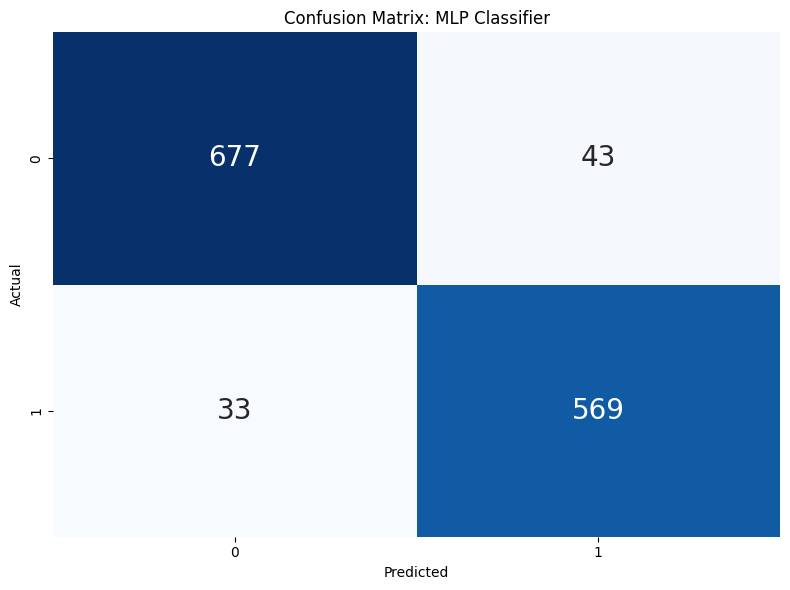

In [26]:


# Гиперпараметры для RandomizedSearch
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500]
}

print('Testing on indirect Features')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10, categorical_cols =['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income',
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender'], numerical_cols=['Sleep_Hours','Physical_Activity'])

print('Testing on Performance Related Features')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10, categorical_cols =["Teacher_Quality"], numerical_cols=['Tutoring_Sessions',
                          "Hours_Studied", "Attendance", "Previous_Scores"])

print('Testing on the Whole Data set')
model_trials(MLPClassifier(random_state=42), "MLP Classifier", param_distributions=param_dist_mlp, n_iter=10)